# Análise de Negócios dos Resultados da Clusterização

Pesquisa de Investimentos Anunciados no Estado de São Paulo (Piesp)
(https://www.piesp.seade.gov.br/ )
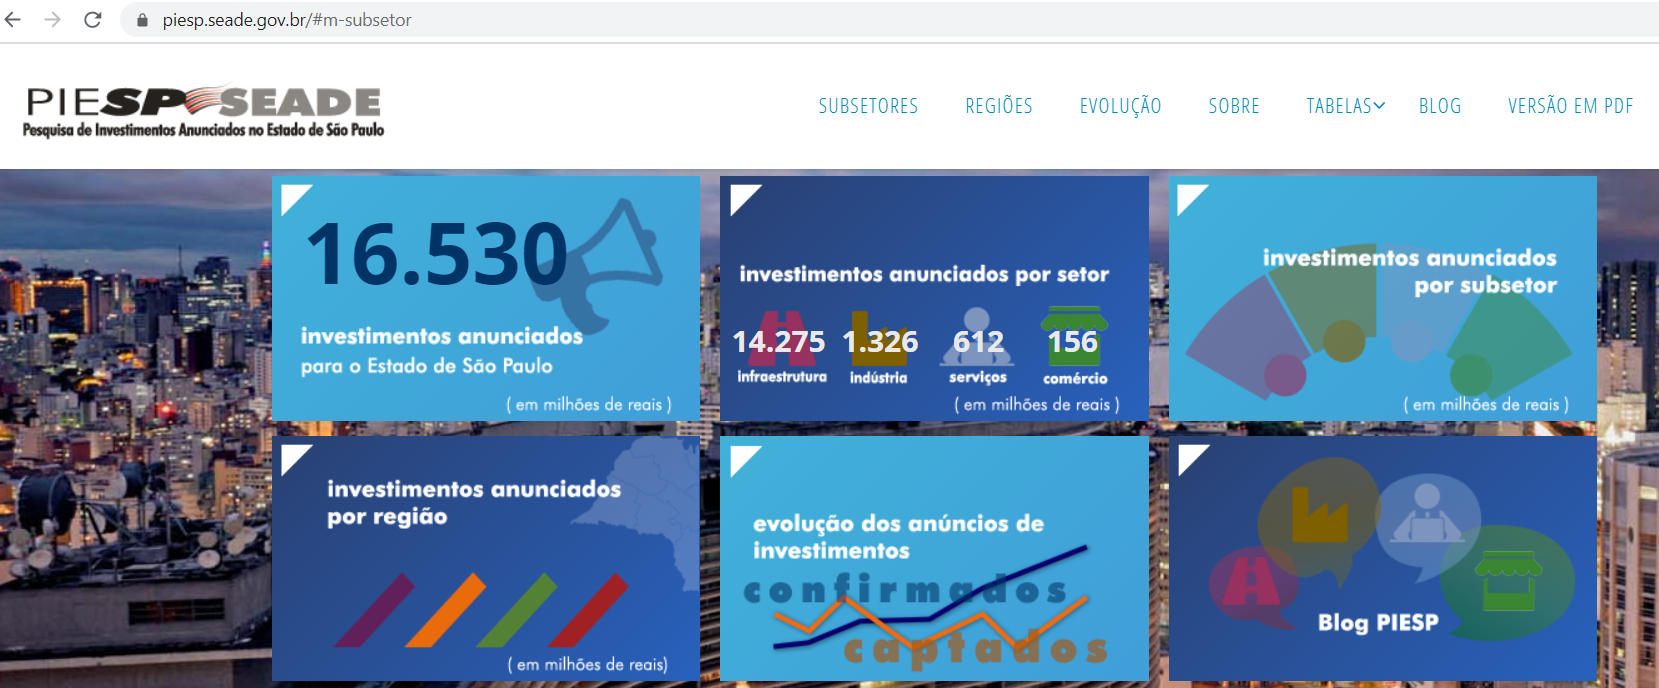
Pesquisa de Investimentos Anunciados no Estado de São Paulo (Piesp)
A PIESP, realizada pela Fundação Seade desde 1998 e, desde o início de 2012, com metodologia revisada, acompanha os anúncios de investimentos produtivos de empresas veiculados na imprensa, fornecendo informações que auxiliam a identificação de tendências setoriais e regionais da economia paulista.

******: Augusto Camargos 

***Date:*** Jan/2021

***Version***: 1.0 

<center>
<img src='C:/Users/gesta/TERA/InvestSP/PIESP.PNG alt="PIESP">
</center>

(Página Inicial > Pesquisas em Campo >  Pesquisa de Investimentos Anunciados no Estado de São Paulo (Piesp) )
A PIESP, realizada pela Fundação Seade desde 1998 e, desde o início de 2012, com metodologia revisada, acompanha os anúncios de investimentos produtivos de empresas veiculados na imprensa, fornecendo informações que auxiliam a identificação de tendências setoriais e regionais da economia paulista.

Todos os anúncios são confirmados com os investidores, por telefone.

In [2]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

#to change the scientific notation precision
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Criando o Dataframe a partir do CSV dfClustersFinal2.csv gerado no notebook de Clusterização: PiespClusterPersona.ipynb



In [3]:
#dfInvestVal.to_csv('dfInvesVal.csv')
dfClustersFinal = pd.read_csv('dfClustersFinal2.csv')
dfClustersFinal.head()

,Unnamed: 0,Data do Anúncio,Ano,Trimestre,Data do Anúncio.1,Empresa alvo do investimento,Empresa(s) investidora(s),Real (em milhões),Dólar (em milhões),Valor Informado,...,Período,Setor,Real,Dólar,FaixaValor,FaixaValorNome,SetorNome,RegiãoNro,klusterK3D,klusterBD3D
0,0,2020-07-17,2020,3,2020-07-17,Cooperativa de Consumo - Coop,Cooperativa de Consumo - Coop,2.00,0.38,Sim,...,... - 2020,1,2000000.00,380000.00,3,M,Comércio,3,2,0
1,1,2020-07-20,2020,3,2020-07-20,Tereos,Tereos Açúcar e Energia Brasil,1.30,0.25,Sim,...,2019 - 2024,3,1300000.00,250000.00,3,M,Indústria,3,2,1
2,2,2020-06-08,2020,3,2020-06-08,EDP São Paulo,EDP São Paulo Distribuição de Energia,6.40,1.17,Sim,...,2020 - ...,5,6400000.00,1170000.00,3,M,Infraestrutura,3,0,2
3,3,2020-09-18,2020,3,2020-09-18,Acqualinda,Thermas Acqualinda,500.00,92.61,Sim,...,2019 - 2021,7,500000000.00,92610000.00,7,GG,Serviços,19,1,3
4,4,2020-10-08,2020,3,2020-10-08,Santa Casa de Araçatuba,Santa Casa de Misericórdia de Araçatuba,8.00,1.46,Sim,...,... - 2020,7,8000000.00,1460000.00,3,M,Serviços,19,0,4


In [4]:
dfClustersFinal['SetorNome'].value_counts()

Serviços          1786
Comércio           923
Infraestrutura     792
Indústria          621
Outros              65
Name: SetorNome, dtype: int64

In [5]:
dfClustersFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4187 entries, 0 to 4186
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         4187 non-null   int64  
 1   Data do Anúncio                    4187 non-null   object 
 2   Ano                                4187 non-null   int64  
 3   Trimestre                          4187 non-null   int64  
 4   Data do Anúncio.1                  4187 non-null   object 
 5   Empresa alvo do investimento       4187 non-null   object 
 6   Empresa(s) investidora(s)          4165 non-null   object 
 7   Real (em milhões)                  4187 non-null   float64
 8   Dólar (em milhões)                 4187 non-null   float64
 9   Valor Informado                    4187 non-null   object 
 10  Município                          4187 non-null   object 
 11  Região                             4187 non-null   objec

In [6]:
dfClustersFinal.shape

(4187, 26)

# Analisando os números dos Clusters K-Means 3D (Setor x Faixa Valor  x  Reigão)

## Temos os 4 Clusters gerados pelo K-Means
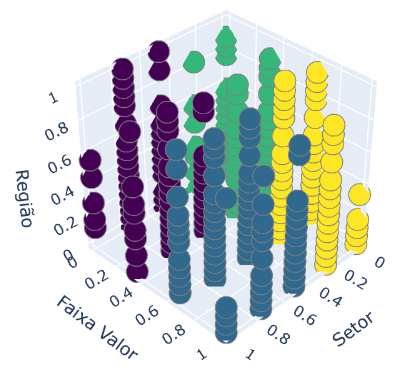

In [7]:
dfClustersFinal['klusterK3D'].unique()



array([2, 0, 1, 3], dtype=int64)

In [8]:
dfClustersFinal['klusterBD3D'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, -1, 23, 24, 25, 35, 26, 27, 28, 29, 30, 45,
       31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44], dtype=int64)

In [12]:
# Conhecendo dados com groupby() e crosstab()

#to change the scientific notation precision
pd.set_option('display.float_format', lambda x: '%0.2f' % x)

# Group by do total de investimentos por ano e trimestre
Tot3DKmeans = dfClustersFinal.groupby(['klusterK3D','SetorNome','FaixaValorNome','Região']).agg({'Real (em milhões)': ['sum','count']})
Tot3DKmeans = Tot3DKmeans.reset_index()
Tot3DKmeans


klusterK3D       SetorNome FaixaValorNome                    Região  \
                                                                          
0            0  Infraestrutura              M           Inter-regionais   
1            0  Infraestrutura              M              RA Araçatuba   
2            0  Infraestrutura              M                  RA Bauru   
3            0  Infraestrutura              M               RA Campinas   
4            0  Infraestrutura              M                RA Central   
..         ...             ...            ...                       ...   
238          3       Indústria             GG                 RA Santos   
239          3       Indústria             GG               RA Sorocaba   
240          3       Indústria             GG  RA São José do Rio Preto   
241          3       Indústria             GG    RA São José dos Campos   
242          3       Indústria             GG              RM São Paulo   

    Real (em milhões)        
                  sum count  
0               71.98    14  
1               31.93     6  
2               67.84    16  
3              236.96    62  
4               12.87     3  
..                ...   ...  
238           2793.00     2  
239           4473.41    18  
240            515.43     2  
241          19367.80    29  
242          25313.91    28  

[243 rows x 6 columns]

In [14]:
TotC1 = Tot3DKmeans[ Tot3DKmeans['klusterK3D'] == 0 ]	
TotC1

klusterK3D       SetorNome FaixaValorNome                    Região  \
                                                                         
0           0  Infraestrutura              M           Inter-regionais   
1           0  Infraestrutura              M              RA Araçatuba   
2           0  Infraestrutura              M                  RA Bauru   
3           0  Infraestrutura              M               RA Campinas   
4           0  Infraestrutura              M                RA Central   
..        ...             ...            ...                       ...   
65          0        Serviços              P                 RA Santos   
66          0        Serviços              P               RA Sorocaba   
67          0        Serviços              P  RA São José do Rio Preto   
68          0        Serviços              P    RA São José dos Campos   
69          0        Serviços              P              RM São Paulo   

   Real (em milhões)        
                 sum count  
0              71.98    14  
1              31.93     6  
2              67.84    16  
3             236.96    62  
4              12.87     3  
..               ...   ...  
65              3.35    18  
66              3.77    17  
67              9.49    43  
68              6.13    28  
69             85.83   311  

[70 rows x 6 columns]

In [10]:
Tot3DKmeans.to_excel('Tot3DKmeans.xlsx')

# Seguem os 4 Clusters gravados no excel


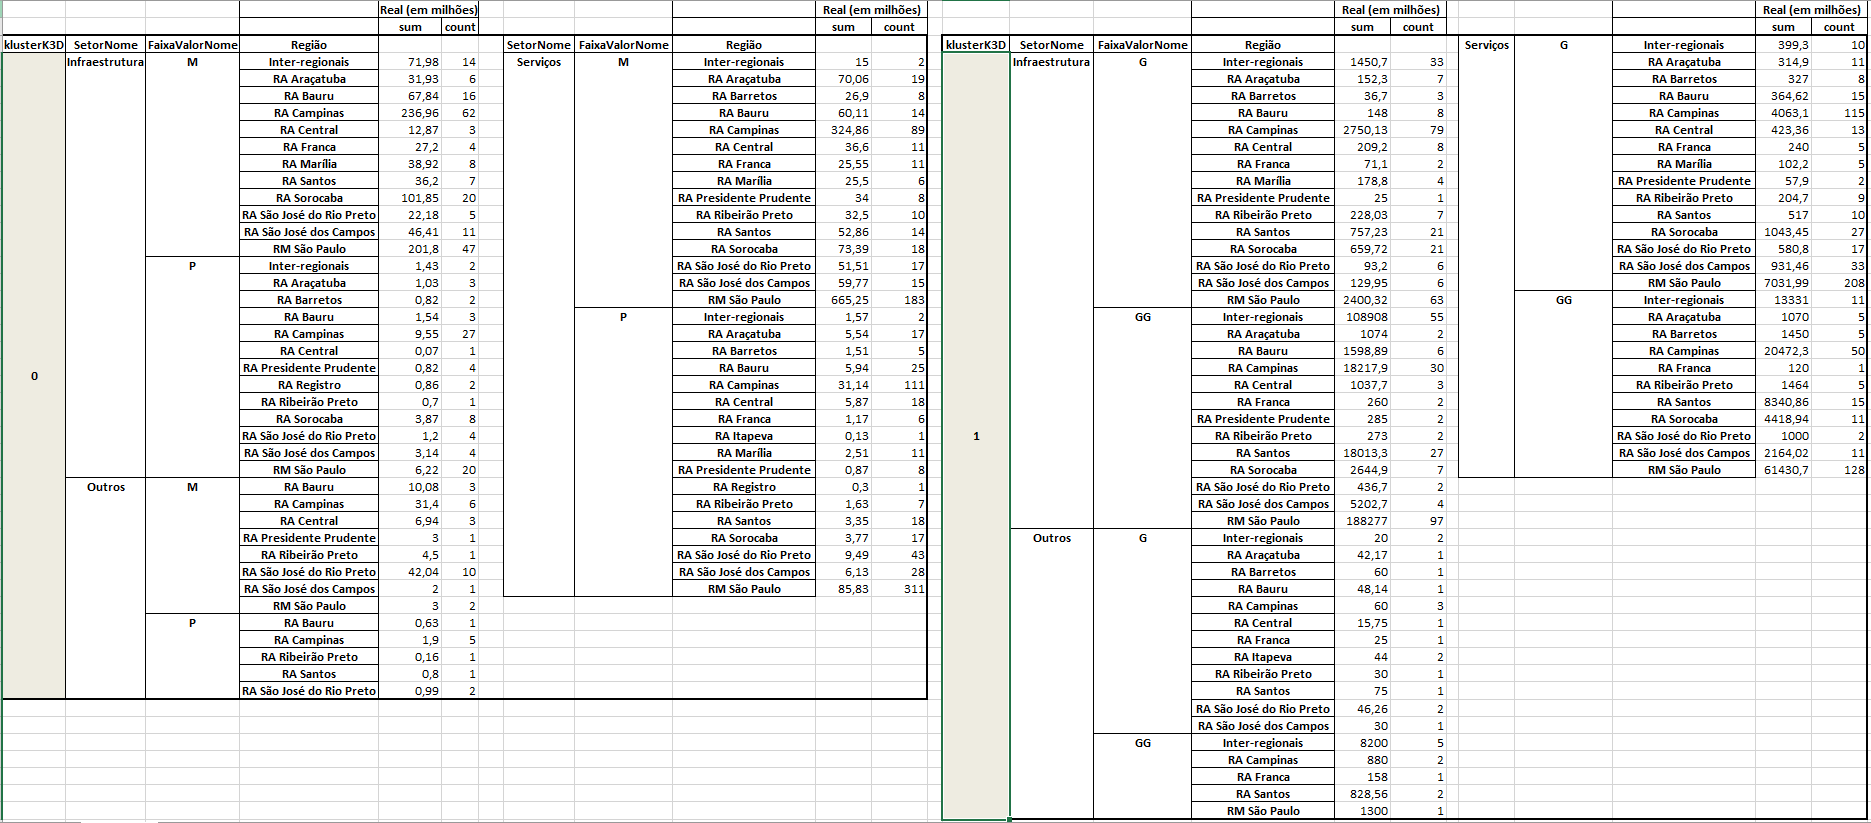

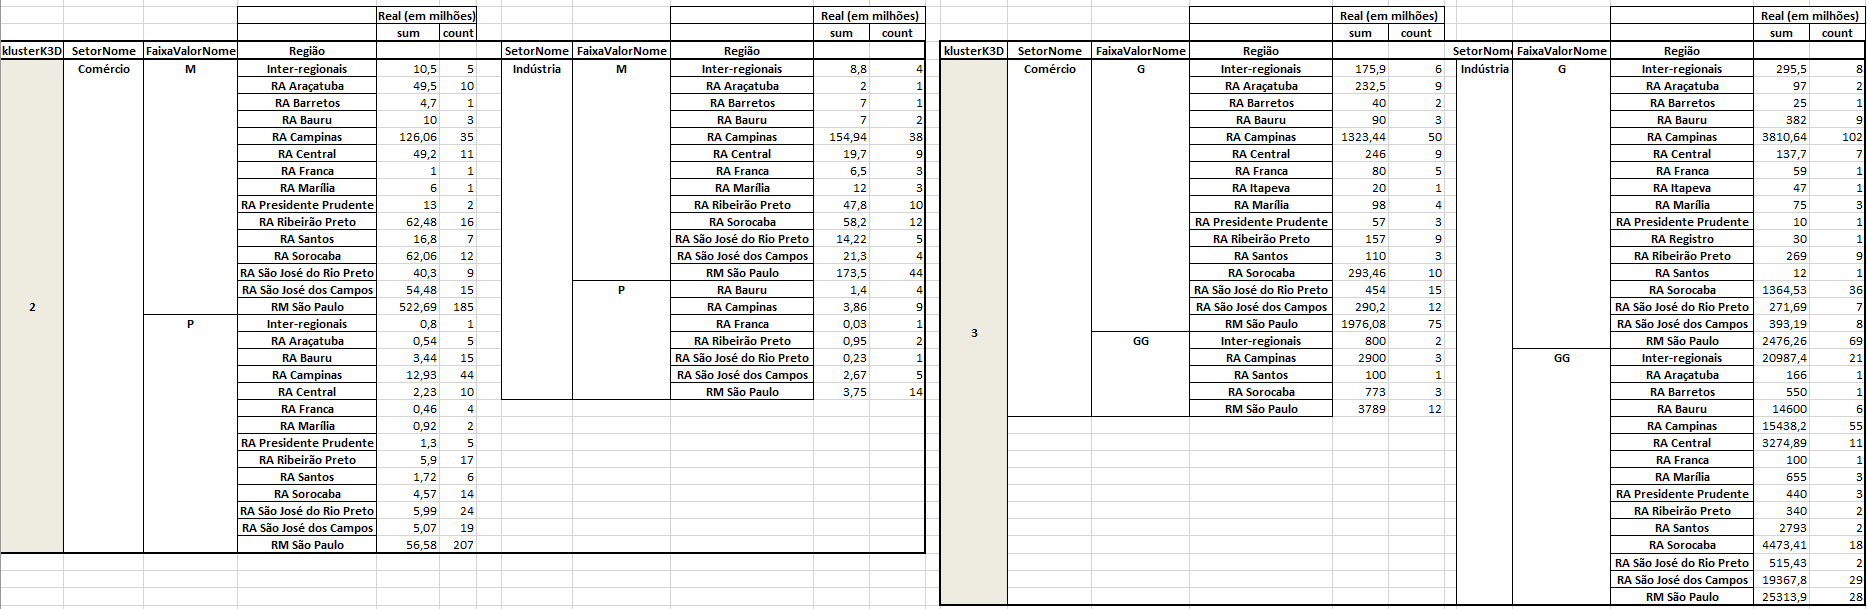

# Analisando os números dos ClustersDBscan 3D (Setor x Tipo Investimento x  Valor Investimento)
# 46 Clusters Gerados

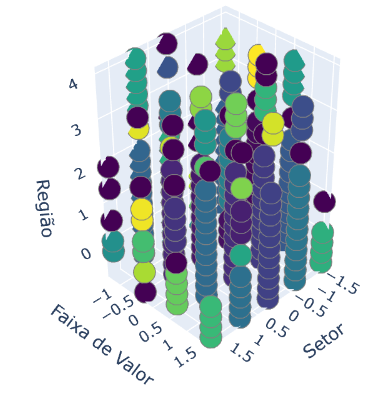

In [58]:
dfClustersFinal['klusterBD3D'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, -1, 23, 24, 25, 35, 26, 27, 28, 29, 30, 45,
       31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44], dtype=int64)

In [57]:
# Group by do total de investimentos - Clusters DBSCan

Tot3DDB = dfClustersFinal.groupby(['klusterBD3D','SetorNome','FaixaValorNome','Região']).agg({'Real (em milhões)': ['sum','count']})
Tot3DDB

Real (em milhões)  \
                                                                            sum   
klusterBD3D SetorNome FaixaValorNome Região                                       
-1          Comércio  G              RA Barretos                          40.00   
                      GG             RA Sorocaba                         773.00   
                      M              RA Barretos                           4.70   
            Indústria G              RA Barretos                          25.00   
                                     RA Itapeva                           47.00   
...                                                                         ...   
 44         Outros    M              RA Central                            6.94   
                                     RA São José do Rio Preto             42.04   
 45         Comércio  M              RA Franca                             1.00   
                                     RA Marília                            6.00   
                                     RA Presidente Prudente               13.00   

                                                                     
                                                              count  
klusterBD3D SetorNome FaixaValorNome Região                          
-1          Comércio  G              RA Barretos                  2  
                      GG             RA Sorocaba                  3  
                      M              RA Barretos                  1  
            Indústria G              RA Barretos                  1  
                                     RA Itapeva                   1  
...                                                             ...  
 44         Outros    M              RA Central                   3  
                                     RA São José do Rio Preto    10  
 45         Comércio  M              RA Franca                    1  
                                     RA Marília                   1  
                                     RA Presidente Prudente       2  

[243 rows x 2 columns]

In [60]:
Tot3DDB.to_excel('Tot3DDBSCAN.xlsx')

# Foram gerados 46 Clusters o que já dificulta uma análise mais alto nível e uma parte relevantes ficou no cluster -1 (Noise/Outlier):
# . 37 investimentos
# . 1984 em milhões

# Conclusões

# O DBScan não se mostrou aplicável dado a grande dispersão dos dados (ponto fraco do DBScan), pois além de ter gerado uma grande quantidade de Cluster (46 Clusters) e classificou uma parte relevante dos investimentos como Noise/Outlier (Cluster -1).

# O K-Means se mostrou bem eficiente gerando 4 Clusters bem formados/definidos pelas dimensões Setor, Faixa de Valor de Investimento e Região.


# Analisando os 4 Clusters gerados pelo K_Means conseguimos ter as seguintes Personas:
# . Persona 1 - Cluster 0: Empresas/Fornecedores com interesse em investimentos P e M para os Setores Infra, Outros e Serviços
# . Persona 2 - cluster 1: Empresas/Fornecedores com interesse em investimentos G e GG para os Setores Infra, Outros e Serviços 
# . Persona 3 - cluster 2: Empresas/Fornecedores com interesse em investimentos P e M para os Setores Comércio e Indústria 
# . Persona 4 - cluster 3: Empresas/Fornecedores com interesse em investimentos G e GG para os Setores Comércio e Indústria 
